In [1]:
### ---- Import Libraries ---- ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.colors as col

In [2]:
### ---- Read Data Files ---- ###

# Read in training data csv file and check head
r_Train = pd.read_csv("trainingData.csv", sep=",")
r_Validate = pd.read_csv("validationData.csv", sep=",")

In [3]:
### ---- Select / Filter Buildings using Loc function ---- ###
#Min = 0, max = 2

building_0 = r_Train.loc[r_Train['BUILDINGID'] == 0]
building_1 = r_Train.loc[r_Train['BUILDINGID'] == 1]
building_2 = r_Train.loc[r_Train['BUILDINGID'] == 2]


building_0_val = r_Validate.loc[r_Validate['BUILDINGID'] == 0]
building_1_val = r_Validate.loc[r_Validate['BUILDINGID'] == 1]
building_2_val = r_Validate.loc[r_Validate['BUILDINGID'] == 2]

Text(0.5, 1.0, 'Buildings by Longitude and Latitude')

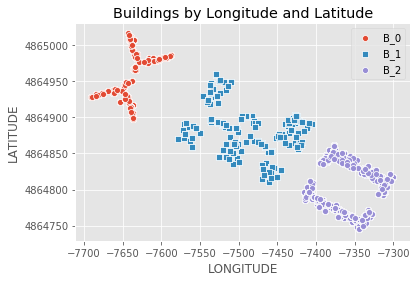

In [4]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

plt.style.use('ggplot')
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_0, marker = "o", label = "B_0") # Can specify which floors using operators
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_1, marker = "s", label = "B_1")
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_2, marker = "o", label = "B_2")
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Buildings by Longitude and Latitude")

In [6]:
building_1['FLOOR'].value_counts()

1    1484
2    1396
0    1368
3     948
Name: FLOOR, dtype: int64

In [6]:
#building_0['FLOOR'].describe()

In [7]:
## Let's run an aggregate function on entire dataframe
building_1.median()
building_1.var()
building_1.max()
building_1.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,5196.0,5196.0,5196.0,5196.0,5196.0,5196.000000,5196.0,5196.000000,5196.0,5196.000000,...,5196.0,5196.000000,5.196000e+03,5196.000000,5196.0,5196.000000,5196.000000,5196.000000,5196.000000,5.196000e+03
mean,100.0,100.0,100.0,100.0,100.0,90.007313,100.0,80.667436,100.0,96.791378,...,100.0,-7488.679411,4.864884e+06,1.370285,1.0,133.131062,1.684950,10.308507,12.675135,1.371718e+09
std,0.0,0.0,0.0,0.0,0.0,41.921917,0.0,55.948088,0.0,24.595335,...,0.0,49.633525,3.626518e+01,1.060587,0.0,79.527892,0.464581,4.612793,5.759131,5.932042e+03
min,100.0,100.0,100.0,100.0,100.0,-96.000000,100.0,-98.000000,100.0,-99.000000,...,100.0,-7578.461972,4.864810e+06,0.000000,1.0,1.000000,1.000000,2.000000,1.000000,1.371709e+09
25%,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.000000,...,100.0,-7533.671000,4.864863e+06,0.000000,1.0,102.000000,1.000000,7.000000,7.000000,1.371715e+09
50%,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.000000,...,100.0,-7491.030634,4.864881e+06,1.000000,1.0,111.000000,2.000000,10.000000,14.000000,1.371716e+09
75%,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.000000,...,100.0,-7439.624500,4.864902e+06,2.000000,1.0,206.000000,2.000000,14.000000,17.000000,1.371720e+09
max,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.000000,...,100.0,-7404.491683,4.864960e+06,3.000000,1.0,249.000000,2.000000,18.000000,23.000000,1.371738e+09


In [9]:
b1 = building_1.drop_duplicates()

#print("Dataframe without Duplicates:\n\n", b0.head(2))

In [10]:
b1_val = building_1_val.drop_duplicates()
#print("Dataframe without Duplicates:\n\n", b0_val.head(2))

In [11]:
## Make a copy of the de duplicated data sets and check shape and columns

c_Train = b1.copy(); 
c_Train.columns
c_Train.shape 

(4938, 529)

In [12]:
## Make a copy of the de duplicated data sets and check shape and columns

c_Val = b1_val.copy();
c_Val.columns
c_Val.shape

(307, 529)

In [13]:
## Here I am changing the data type of the column names from Index to List

wap_names = c_Train.columns[0:520].tolist()
wap_names_val = c_Val.columns[0:520].tolist()

In [14]:
var_0_filter = c_Train.loc[c_Train.loc[:,wap_names].var(axis=1) == 0,:]

In [15]:
var_1_filter = c_Train.loc[c_Train.loc[:,wap_names].var(axis=1) != 0,:]

In [16]:
var_0_filter_val = c_Val.loc[c_Val.loc[:,wap_names].var(axis=1) == 0,:]

In [17]:
var_1_filter_val = c_Val.loc[c_Val.loc[:,wap_names].var(axis=1) != 0,:]

In [18]:
## Rename the main dataframe for simplicity

v1 = var_1_filter.copy()

In [19]:
## Subsetting the data we need into two data frames
# DF 1 shows all columns non wap

v1_waps = v1.iloc[:,0:520]

In [20]:
## Subsetting the data we need into two data frames
# DF 2 shows all columns non wap
v1_notwaps = v1.iloc[:, 520:529]

In [21]:
v1_notwaps.columns

Index(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object')

In [22]:
## Doing a precheck on values before normalising the WAPs by row 
v1_waps.max()
v1_waps.min()

WAP001    100
WAP002    100
WAP003    100
WAP004    100
WAP005    100
         ... 
WAP516    100
WAP517    100
WAP518    100
WAP519    100
WAP520    100
Length: 520, dtype: int64

In [62]:
## Subset the dataframe based on User

v1.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [ ]:
sns.scatterplot()

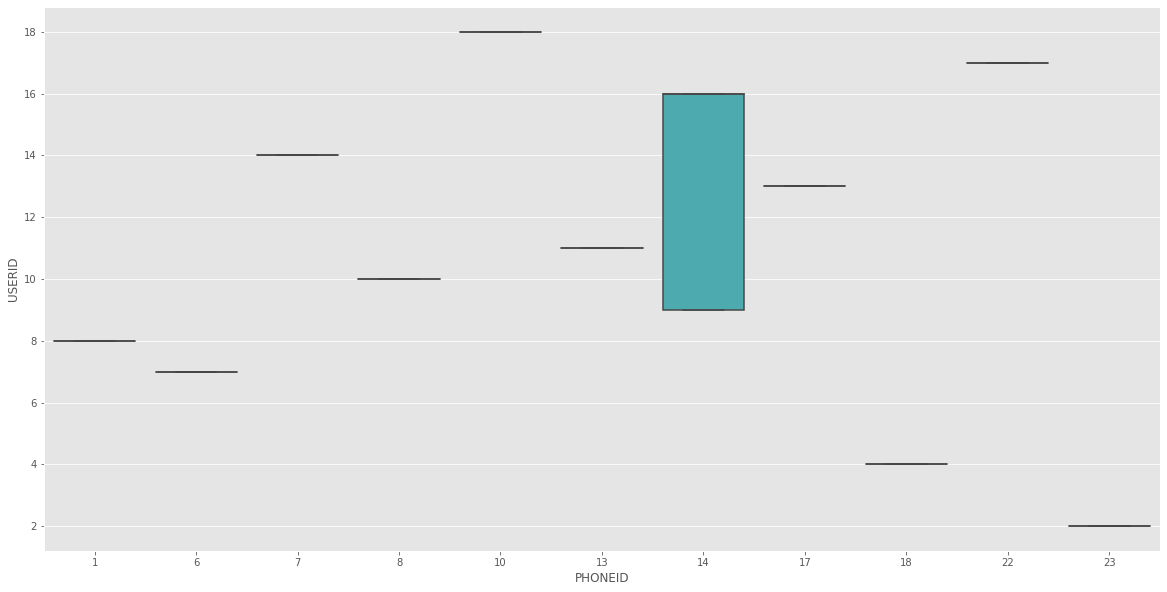

In [72]:
#### ----  LET'S LOOK AT USERS MORE CLOSELY ---- ####

x = v1.loc[:,'PHONEID']
y = v1.loc[:,'USERID']

plt.style.use('ggplot')
sns.boxplot(x, y, data=v1) # Can specify which floors using operators
plt.rcParams["figure.figsize"] = (20,10)

In [77]:
### Select all phone ID's but exclude Phone 15 which is shared by multiple users

filt_14 = v1.loc[v1["USERID"] != 14]

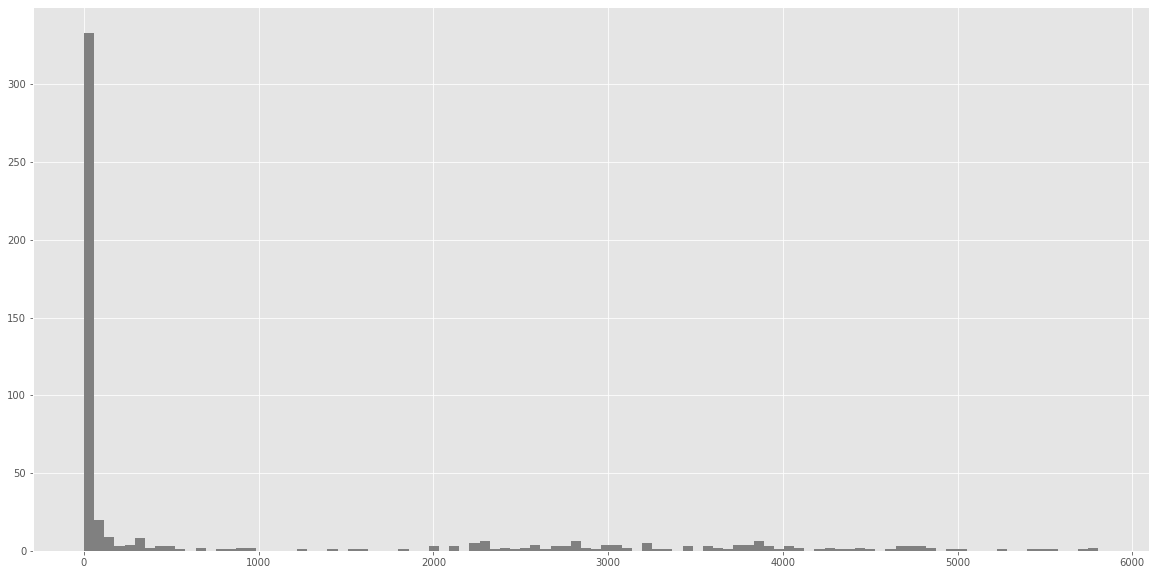

In [78]:
filt_14[wap_names].var().hist(bins=100, color="grey")

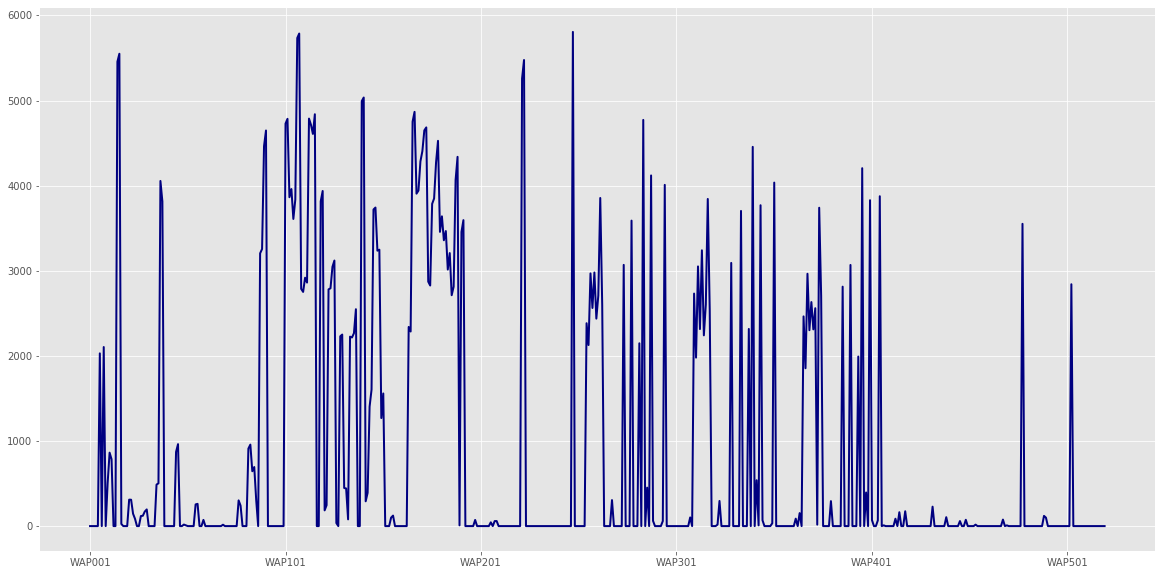

In [79]:
 filt_14.iloc[:,0:520].var().plot(linewidth=2, color="navy")

In [80]:
## Using Scikitlearn to perform normalisation 
# Alternative 1

from sklearn.preprocessing import Normalizer
X = filt_14.iloc[:,0:520]
transformer = Normalizer().fit(X) # fit does nothing in this case
transformer
transformer.transform(X)

array([[0.04412907, 0.04412907, 0.04412907, ..., 0.04412907, 0.04412907,
        0.04412907],
       [0.04411699, 0.04411699, 0.04411699, ..., 0.04411699, 0.04411699,
        0.04411699],
       [0.0440411 , 0.0440411 , 0.0440411 , ..., 0.0440411 , 0.0440411 ,
        0.0440411 ],
       ...,
       [0.04388709, 0.04388709, 0.04388709, ..., 0.04388709, 0.04388709,
        0.04388709],
       [0.04403871, 0.04403871, 0.04403871, ..., 0.04403871, 0.04403871,
        0.04403871],
       [0.04402676, 0.04402676, 0.04402676, ..., 0.04402676, 0.04402676,
        0.04402676]])

In [81]:
## Here Iam selecting the User 11 fields not relating to WAP

Y = filt_14.iloc[:,520:529]

In [82]:
Y 

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
5,-7533.8962,4.864939e+06,2,1,105,2,2,23,1371713841
...,...,...,...,...,...,...,...,...,...
19930,-7516.1984,4.864890e+06,3,1,4,2,18,10,1371710817
19932,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19934,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [83]:
## Turn the normalised X array into a DataFrame

X_df = pd.DataFrame(X)
X_df.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,4457.0,4457.0,4457.0,4457.0,4457.0,4457.000000,4457.0,4457.000000,4457.0,4457.000000,...,4457.0,4457.0,4457.0,4457.0,4457.0,4457.0,4457.0,4457.0,4457.0,4457.0
mean,100.0,100.0,100.0,100.0,100.0,88.350460,100.0,87.676240,100.0,97.325107,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
std,0.0,0.0,0.0,0.0,0.0,45.051114,0.0,45.869614,0.0,22.529245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,100.0,100.0,100.0,100.0,100.0,-96.000000,100.0,-98.000000,100.0,-99.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
25%,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
50%,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
75%,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
max,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [34]:
## Quick check on shape to two dataframes before rejoining

In [84]:
Y.shape

(4457, 9)

In [85]:
## Merge the normalised X array and remaining columns into a DataFrame

merged_df = pd.merge(X_df, Y, left_index = True, right_index = True)

In [86]:
normed_df = merged_df.copy()

In [87]:
normed_df = merged_df.copy()

In [88]:
normed_df.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

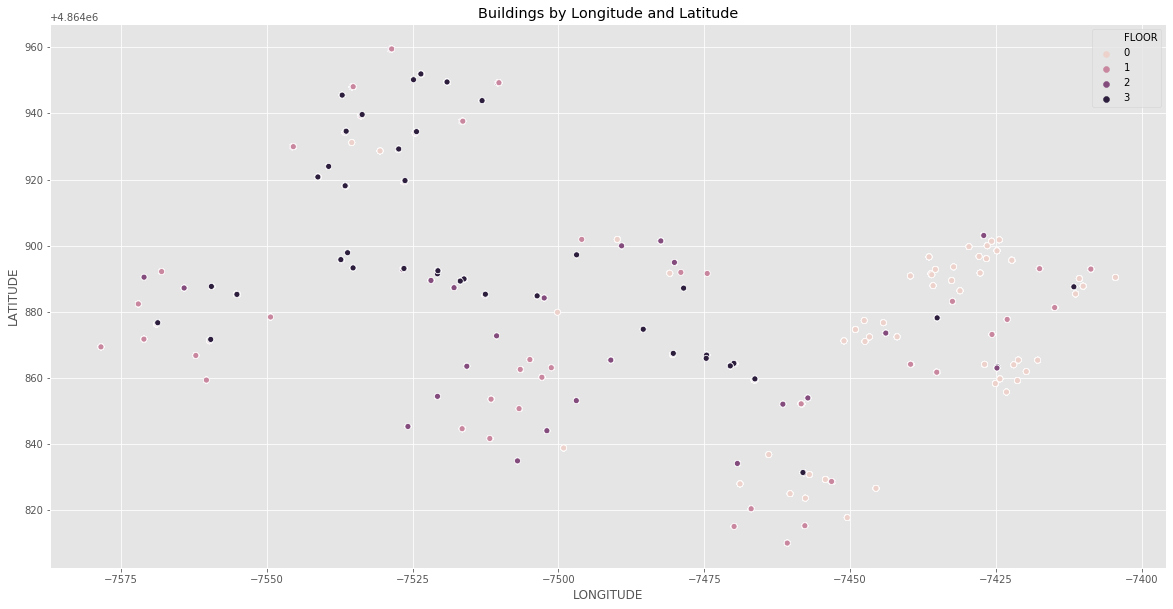

In [89]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

## Using the normalised and merged dataframe
plt.style.use('ggplot')
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=normed_df, hue = "FLOOR", marker = "o") # Can specify which floors using operators
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Buildings by Longitude and Latitude")
plt.savefig("B0 user 1.png")

In [90]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

## Start making selections by User and Phone ID

In [91]:
## Create some new dataframe groupings for Users, Phones and Combination

#user_group = normed_df.groupby(["USERID"]).count()
#phone_group = normed_df.groupby(["PHONEID"]).count()
#phone_user_group = normed_df.groupby(["PHONEID", "USERID"]).count()

In [92]:
## Let's filter the WAPs by User
normed_df['USERID']

0         2
1         2
2         2
3         2
5         2
         ..
19930    18
19932    18
19934    18
19935    18
19936    18
Name: USERID, Length: 4457, dtype: int64

In [93]:
normed_df['PHONEID']

0        23
1        23
2        23
3        23
5        23
         ..
19930    10
19932    10
19934    10
19935    10
19936    10
Name: PHONEID, Length: 4457, dtype: int64

In [94]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES  ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X = (normed_df.iloc[:, 0:520]) # Independent variable
y = (normed_df.loc[:, "FLOOR"]) #  Target column
#X.shape
#y.shape

In [95]:
#### ----  GENERIC MODEL PREPROCESSING ---- ###

## TRAIN TEST SPLIT

## Splitting into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [96]:
#### ---- ERROR METRICS FOR REGRESSION ---- ####

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [97]:
#### ----  REGRESSION 1: GRADIENT BOOSTED TREES ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.ensemble import GradientBoostingRegressor

## Fitting Linear Regression to the Training Set
gbt_reg = GradientBoostingRegressor()
gbt_reg.fit(X_train, y_train)


## Predicting the Test set results
y_pred = gbt_reg.predict(X_test)

In [98]:
## Assigning error metrics

mse_gbt = round(mean_squared_error(y_test, y_pred), 4)
rmse_gbt = round(np.sqrt(mse_gbt), 4)
mae_gbt = round(mean_absolute_error(y_test, y_pred), 4)
r2_gbt = round(r2_score(y_test, y_pred), 4)

In [99]:
## Printing out errors in DataFrame format

model_name = "Gradient Boosted Trees"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
    f"-----------------------------------------------------\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Mean Squared Error (MSE) is:\n", mse_gbt,
      "\n\n", f"The Root Mean Squared Error (RMSE) is:\n",rmse_gbt,
      "\n\n", f"The Mean Absolute Error (MAE) is:\n",mae_gbt,
      "\n\n", f"The Correlation (r2) is:\n",r2_gbt,"\n\n",
      "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Gradient Boosted Trees 

-----------------------------------------------------

-----------------------------------------------------

 The Mean Squared Error (MSE) is:
 0.0836 

 The Root Mean Squared Error (RMSE) is:
 0.2891 

 The Mean Absolute Error (MAE) is:
 0.2027 

 The Correlation (r2) is:
 0.9325 

 -----------------------------------------------------



In [100]:
### ---- ERROR VISUALISATION: SETTING VARIABLES FOR PLOTS ---- ###

## Selecting the X and Y data
y_residual = (y_test - y_pred)
x = y_test
y = y_residual



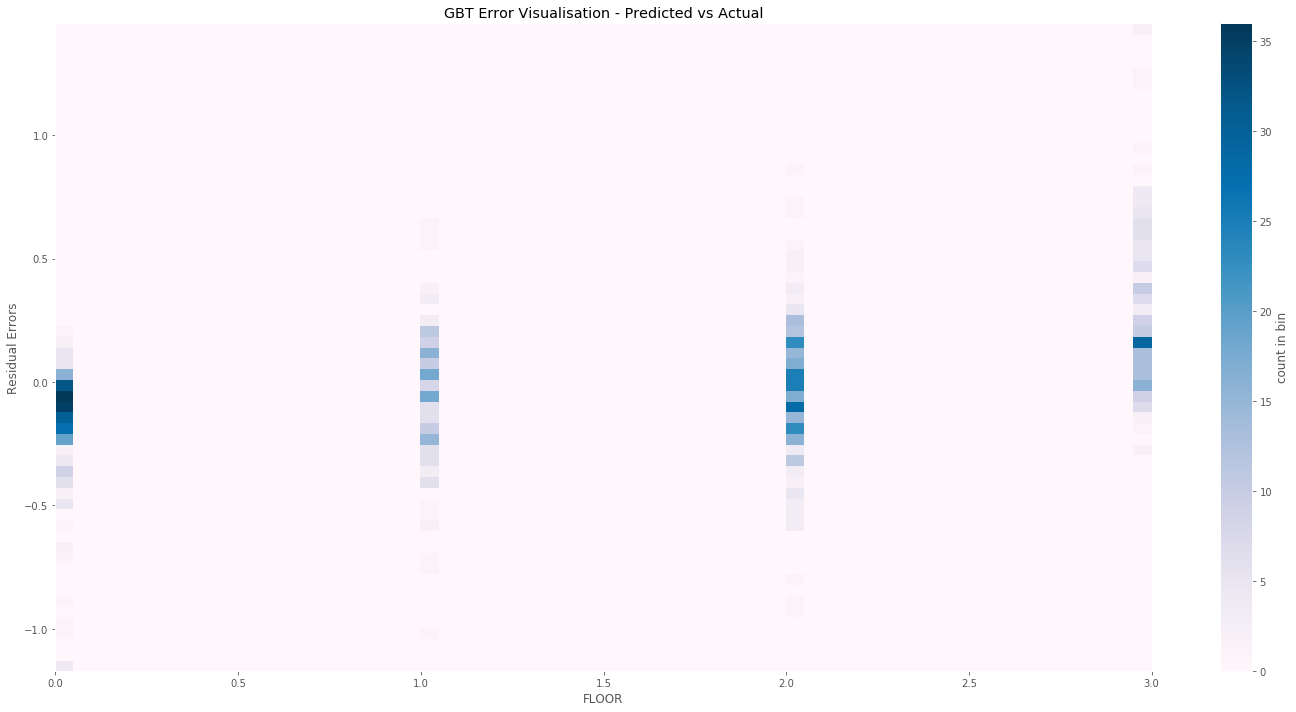

In [101]:
#### ---- ERROR VISUALISATION: PLOTTING RESIDUALS - DENSITY - TWO DIMENSIONAL HISTOGRAM ---- ####

## Using Two Dimensional Binnings with a Colorbar

plt.style.use('ggplot')

## Setting variables
x=y_test
y=y_residual

## Setting Aesthetics and Labelling
plt.hist2d(x, y, bins=60, cmap='PuBu')
plt.colorbar(label='count in bin')

plt.title("GBT Error Visualisation - Predicted vs Actual")
plt.xlabel("FLOOR")
plt.ylabel("Residual Errors")
plt.ticklabel_format()
plt.tight_layout()
plt.grid(True) ## Adds grid lines

plt.savefig("GBT Error Plt B1 floor.png")

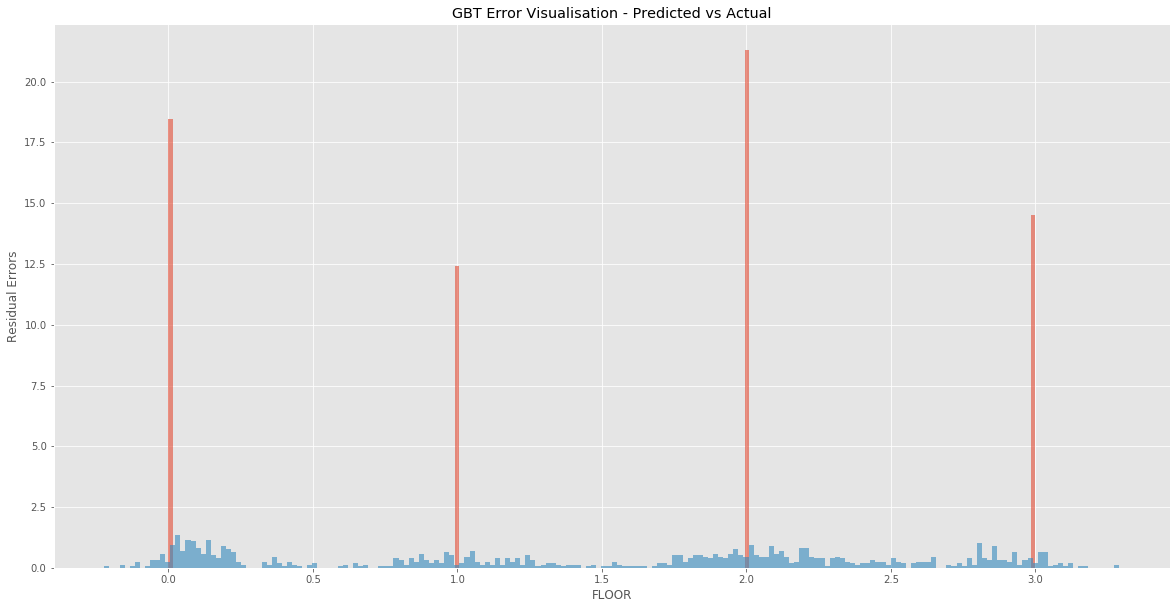

In [102]:
### ---- ERROR VISUALISATION: ACTUAL V PREDICTED COORDINATES ---- ###

x1 = y_test
x2 = y_pred
#x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(histtype='stepfilled', density=True, alpha=0.6, bins=200)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
#plt.hist(x3, **kwargs)
plt.title("GBT Error Visualisation - Predicted vs Actual")
plt.xlabel("FLOOR")
plt.ylabel("Residual Errors")


plt.savefig("GBT Error Hist Building 1 - Floor.png")

In [103]:
## Let's restart the modelling with classification

In [104]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES FOR BUILDING 2 ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X = normed_df.iloc[:, 0:520] # WAP columns
y = normed_df.loc[:, "FLOOR"] # Floor Target column


In [105]:
### Here I am moving over to Classification Modelling

#### ---- ERROR METRICS FOR CLASSIFICATION ---- ####

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import f1_score

In [106]:
#### ----  MODEL ITERATION 1: LOGISTIC REGRESSION ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.linear_model import LogisticRegression

## Apply Fit mathod to training data

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred = log_reg.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [107]:
cm_log = confusion_matrix(y_test, y_pred)
acc_log = round(accuracy_score(y_test, y_pred), 4)
prec_log = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_log = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_log = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [108]:
model_name = "Logistic Regression"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_log, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_log,
      "\n\n", f"Precision is:\n",prec_log,
      "\n\n", f"Recall is:\n",recall_log,
      "\n\n", f"Cohen's Kappa is:\n", kappa_log,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Logistic Regression 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 1  Floor 2  Floor 3  Floor 4
Floor 1      237       10        0        0
Floor 2        2      163        1        0
Floor 3        1        1      273       10
Floor 4        1        0        5      188 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9652 

 Precision is:
 0.9658 

 Recall is:
 0.9652 

 Cohen's Kappa is:
 0.9531 

-----------------------------------------------------



In [109]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x  LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                  
4678         3 -7527.4026  4.864929e+06        3            3   True
4846         3 -7519.1118  4.864950e+06        3            3   True
19374        3 -7474.6700  4.864866e+06        3            3   True
663          2 -7524.5704  4.864934e+06        2            2   True
691          2 -7511.5215  4.864854e+06        2            2   True
...        ...        ...           ...      ...          ...    ...
5059         3 -7568.7231  4.864877e+06        3            3   True
4111         0 -7423.0609  4.864878e+06        0            0   True
1431         2 -7571.0934  4.864872e+06        2            2   True
1389         2 -7523.6282  4.864952e+06        2            2   True
4405         0 -7435.3779  4.864893e+06        0            0   True

[892 rows x 6 columns]


Text(0.5, 1.0, 'Error Visualisation - Building 1 Floor Prediction Errors')

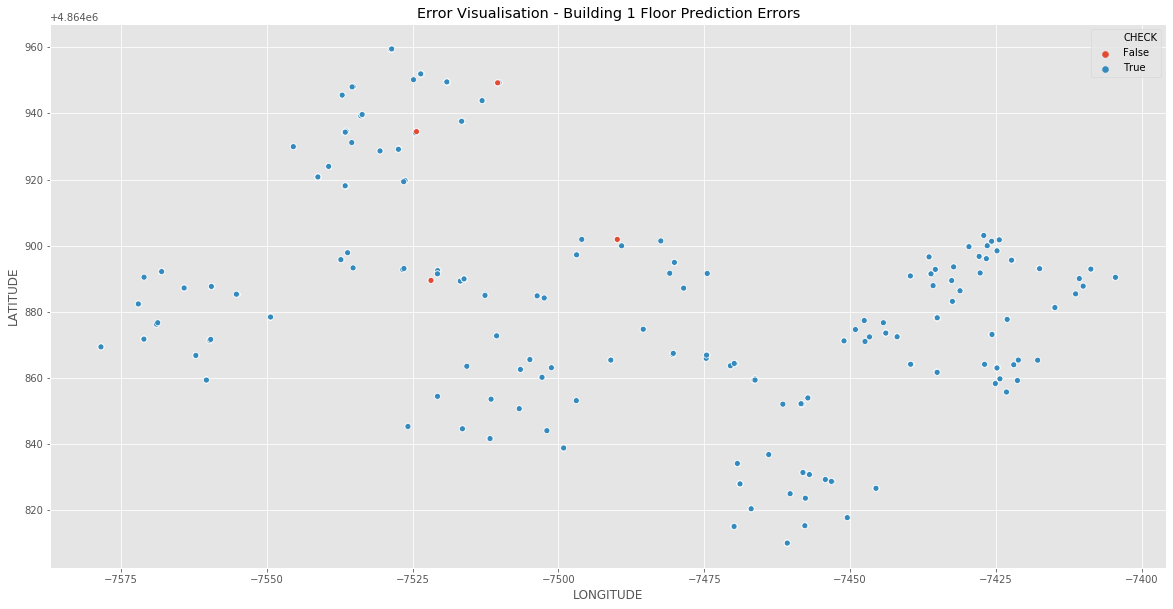

In [110]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 1 Floor Prediction Errors")

In [111]:
#### ----  MODEL ITERATION 2: DECISION TREE ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.tree import DecisionTreeClassifier

## Apply Fit mathod to training data

clf = DecisionTreeClassifier(criterion = 'entropy', random_state= 42)
clf.fit(X_train, y_train)

## Predicting the test set results
y_pred = clf.predict(X_test)

In [112]:
cm_dt = confusion_matrix(y_test, y_pred)
acc_dt = round(accuracy_score(y_test, y_pred), 4)
prec_dt = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_dt = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_dt = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [113]:
model_name = "Decision Tree"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_dt, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_dt,
      "\n\n", f"Precision is:\n",prec_dt,
      "\n\n", f"Recall is:\n",recall_dt,
      "\n\n", f"Cohen's Kappa is:\n", kappa_dt,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Decision Tree 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 1  Floor 2  Floor 3  Floor 4
Floor 1      241        6        0        0
Floor 2        2      158        4        2
Floor 3        0        7      269        9
Floor 4        0        2        5      187 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9585 

 Precision is:
 0.9592 

 Recall is:
 0.9585 

 Cohen's Kappa is:
 0.944 

-----------------------------------------------------



In [114]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x  LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                  
4678         3 -7527.4026  4.864929e+06        3            3   True
4846         3 -7519.1118  4.864950e+06        3            3   True
19374        3 -7474.6700  4.864866e+06        3            3   True
663          2 -7524.5704  4.864934e+06        2            2   True
691          2 -7511.5215  4.864854e+06        2            2   True
...        ...        ...           ...      ...          ...    ...
5059         3 -7568.7231  4.864877e+06        3            3   True
4111         0 -7423.0609  4.864878e+06        0            0   True
1431         2 -7571.0934  4.864872e+06        2            2   True
1389         2 -7523.6282  4.864952e+06        2            2   True
4405         0 -7435.3779  4.864893e+06        0            0   True

[892 rows x 6 columns]


Text(0.5, 1.0, 'Error Visualisation - Building 0 Floor Prediction Errors')

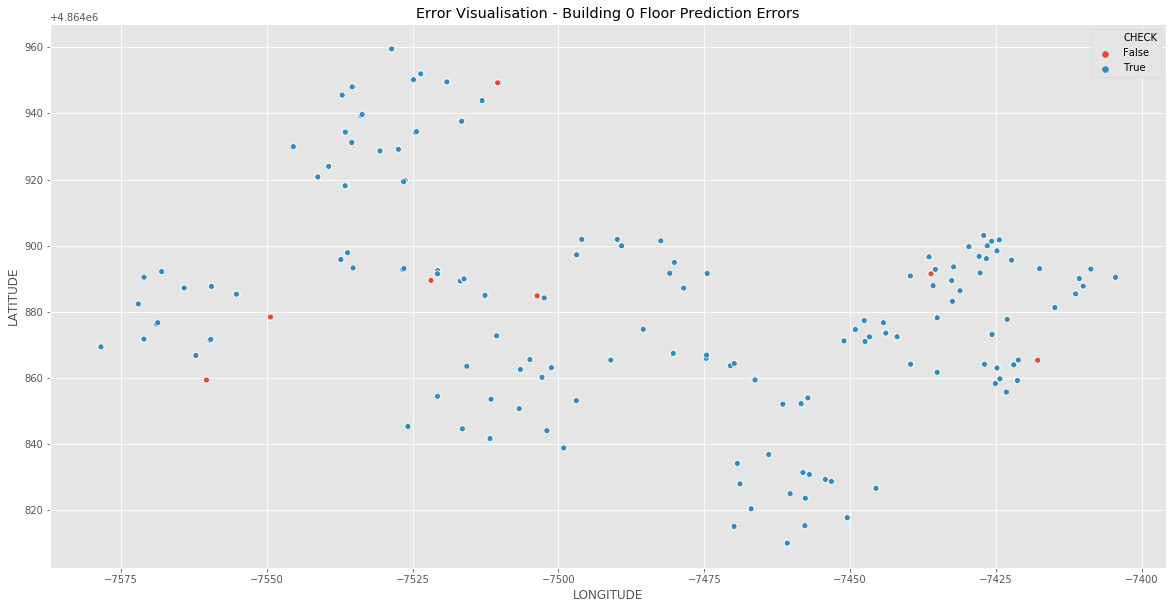

In [115]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 0 Floor Prediction Errors")

In [116]:
#### ----  MODEL ITERATION 3: K NEAREST NEIGHBOUR ---- ####

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.neighbors import KNeighborsClassifier

## Apply Fit mathod to training data

classifier = KNeighborsClassifier (n_neighbors= 5)
classifier.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred = classifier.predict(X_test)

In [117]:
cm_knn = confusion_matrix(y_test, y_pred)
acc_knn = round(accuracy_score(y_test, y_pred), 4)
prec_knn = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_knn = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_knn = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [118]:
model_name = "K Nearest Neighbour"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_knn, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_knn,
      "\n\n", f"Precision is:\n",prec_knn,
      "\n\n", f"Recall is:\n",recall_knn,
      "\n\n", f"Cohen's Kappa is:\n", kappa_knn,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for K Nearest Neighbour 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 1  Floor 2  Floor 3  Floor 4
Floor 1      242        2        3        0
Floor 2        3      162        1        0
Floor 3        1        2      273        9
Floor 4        0        0        0      194 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9765 

 Precision is:
 0.9768 

 Recall is:
 0.9765 

 Cohen's Kappa is:
 0.9682 

-----------------------------------------------------



In [119]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x  LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                  
4678         3 -7527.4026  4.864929e+06        3            3   True
4846         3 -7519.1118  4.864950e+06        3            3   True
19374        3 -7474.6700  4.864866e+06        3            3   True
663          2 -7524.5704  4.864934e+06        2            2   True
691          2 -7511.5215  4.864854e+06        2            2   True
...        ...        ...           ...      ...          ...    ...
5059         3 -7568.7231  4.864877e+06        3            3   True
4111         0 -7423.0609  4.864878e+06        0            0   True
1431         2 -7571.0934  4.864872e+06        2            2   True
1389         2 -7523.6282  4.864952e+06        2            2   True
4405         0 -7435.3779  4.864893e+06        0            0   True

[892 rows x 6 columns]


Text(0.5, 1.0, 'Error Visualisation - Building 1 Floor Prediction Errors')

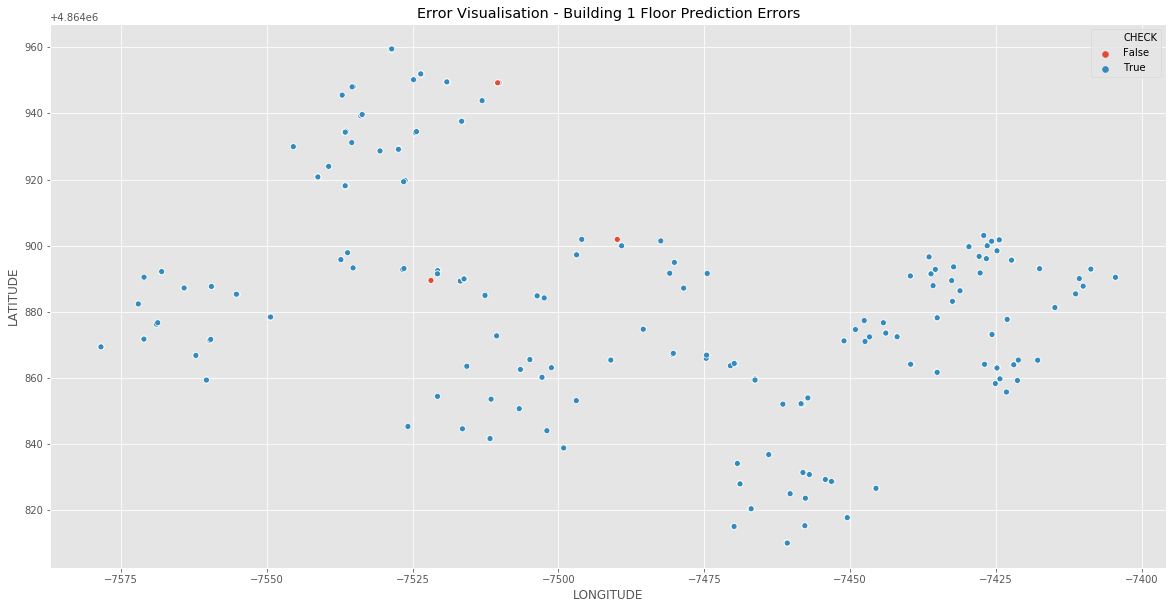

In [122]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 1 Floor Prediction Errors")

In [123]:
#### ----  MODEL ITERATION 4: RANDOM FOREST PART 2 RF ---- ####

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Apply Fit mathod to training data

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred = rf_clf.predict(X_test)

In [124]:
cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = round(accuracy_score(y_test, y_pred), 4)
prec_rf = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_rf = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_rf = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [125]:
model_name = "Random Forest"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_rf, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_rf,
      "\n\n", f"Precision is:\n",prec_rf,
      "\n\n", f"Recall is:\n",recall_rf,
      "\n\n", f"Cohen's Kappa is:\n", kappa_rf,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Random Forest 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 1  Floor 2  Floor 3  Floor 4
Floor 1      247        0        0        0
Floor 2        0      166        0        0
Floor 3        0        0      283        2
Floor 4        0        0        0      194 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9978 

 Precision is:
 0.9978 

 Recall is:
 0.9978 

 Cohen's Kappa is:
 0.997 

-----------------------------------------------------



In [126]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x  LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                  
4678         3 -7527.4026  4.864929e+06        3            3   True
4846         3 -7519.1118  4.864950e+06        3            3   True
19374        3 -7474.6700  4.864866e+06        3            3   True
663          2 -7524.5704  4.864934e+06        2            2   True
691          2 -7511.5215  4.864854e+06        2            2   True
...        ...        ...           ...      ...          ...    ...
5059         3 -7568.7231  4.864877e+06        3            3   True
4111         0 -7423.0609  4.864878e+06        0            0   True
1431         2 -7571.0934  4.864872e+06        2            2   True
1389         2 -7523.6282  4.864952e+06        2            2   True
4405         0 -7435.3779  4.864893e+06        0            0   True

[892 rows x 6 columns]


Text(0.5, 1.0, 'Error Visualisation - Building 1 Floor Prediction Errors')

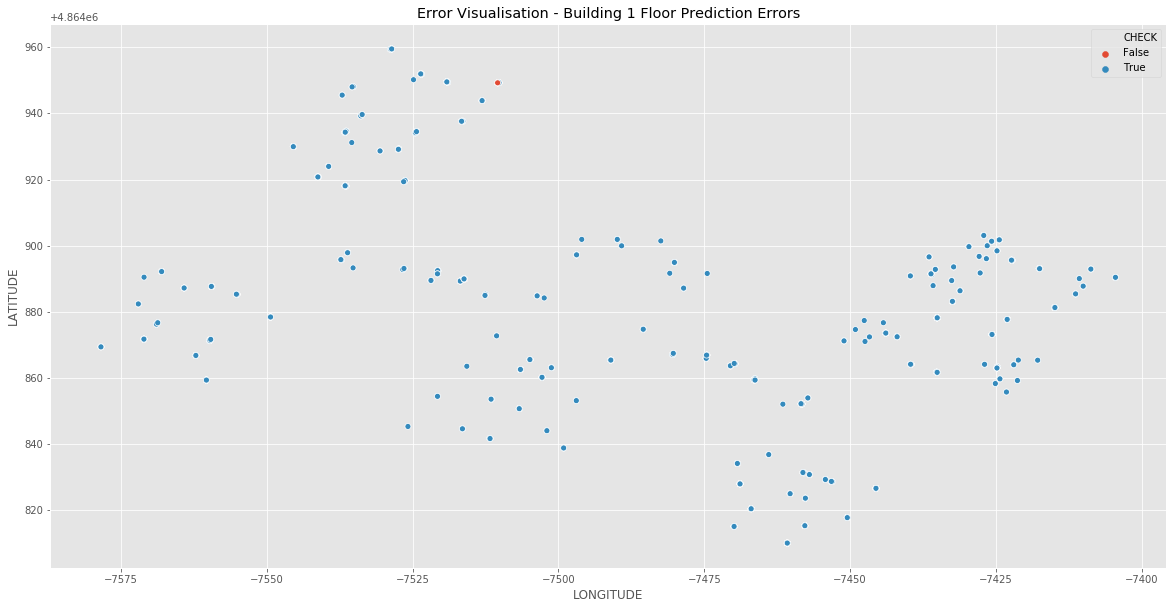

In [127]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 1 Floor Prediction Errors")

In [128]:
cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = round(accuracy_score(y_test, y_pred), 4)
prec_rf = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_rf = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_rf = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [129]:
#### ---- CREATING A CONSOLIDATED ERROR DATAFRAME USING DICTIONARIES ERROR WISE COLUMNS---- ####

error_df = pd.DataFrame(
    { #"Confusion Matrix" : [cm_log, cm_dt, cm_knn, cm_rf],
      "Accuracy" : [acc_log, acc_dt, acc_knn, acc_rf],
      "Precision" : [prec_log, prec_dt, prec_knn, prec_rf],
      "Recall" : [recall_log, recall_dt, recall_knn, recall_rf],
      "Cohen's Kapa" : [kappa_log, kappa_dt, kappa_knn, kappa_rf]},
     index = ["Logistic Regression", "Decision Tree", "K Nearest Neighbour", "Random Forest"])

error_df

,Accuracy,Precision,Recall,Cohen's Kapa
Logistic Regression,0.9652,0.9658,0.9652,0.9531
Decision Tree,0.9585,0.9592,0.9585,0.9440
K Nearest Neighbour,0.9765,0.9768,0.9765,0.9682
Random Forest,0.9978,0.9978,0.9978,0.9970


In [130]:
#### ---- CREATING A CONSOLIDATED ERROR DATAFRAME USING DICTIONARIES ERROR WISE COLUMNS---- ####

error_df_flat = pd.DataFrame(
    { "Logistic Regression" : [acc_log, prec_log, recall_log, kappa_log],
      "Decision Tree" : [acc_dt, prec_dt, recall_dt, kappa_dt],
      "K Nearest Neighbour" : [acc_knn, prec_knn, recall_knn, kappa_knn],
      "Random Forest" : [acc_rf, prec_rf, recall_rf, kappa_rf]},
     index = ["Accuracy", "Precision", "Recall", "Kappa"])

error_df_flat

,Logistic Regression,Decision Tree,K Nearest Neighbour,Random Forest
Accuracy,0.9652,0.9585,0.9765,0.9978
Precision,0.9658,0.9592,0.9768,0.9978
Recall,0.9652,0.9585,0.9765,0.9978
Kappa,0.9531,0.9440,0.9682,0.9970


Text(0.5, 1.0, 'Which Model shows best error metrics')

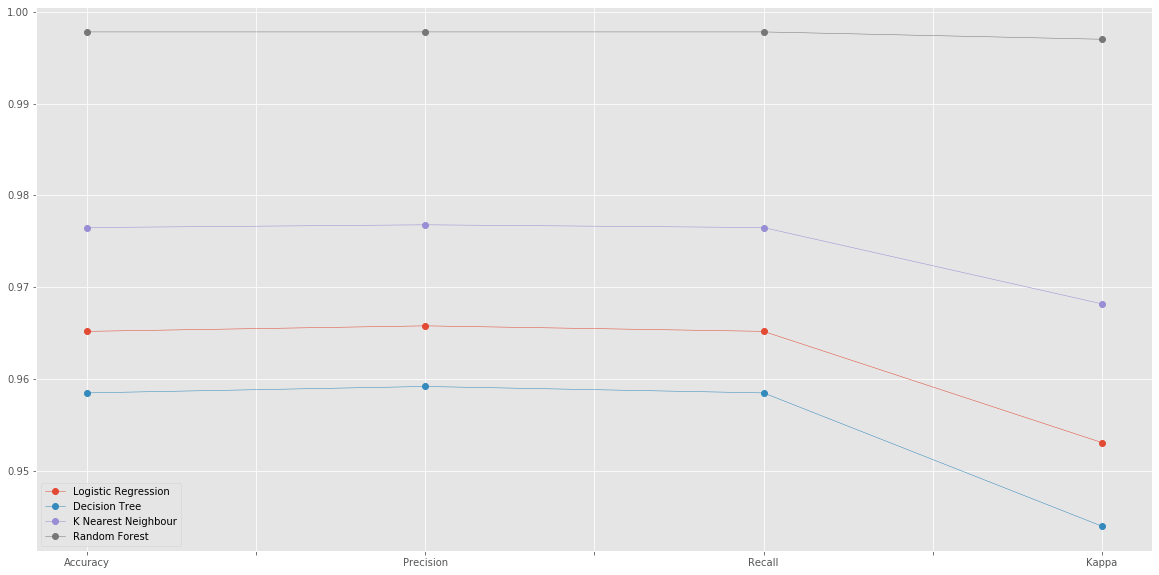

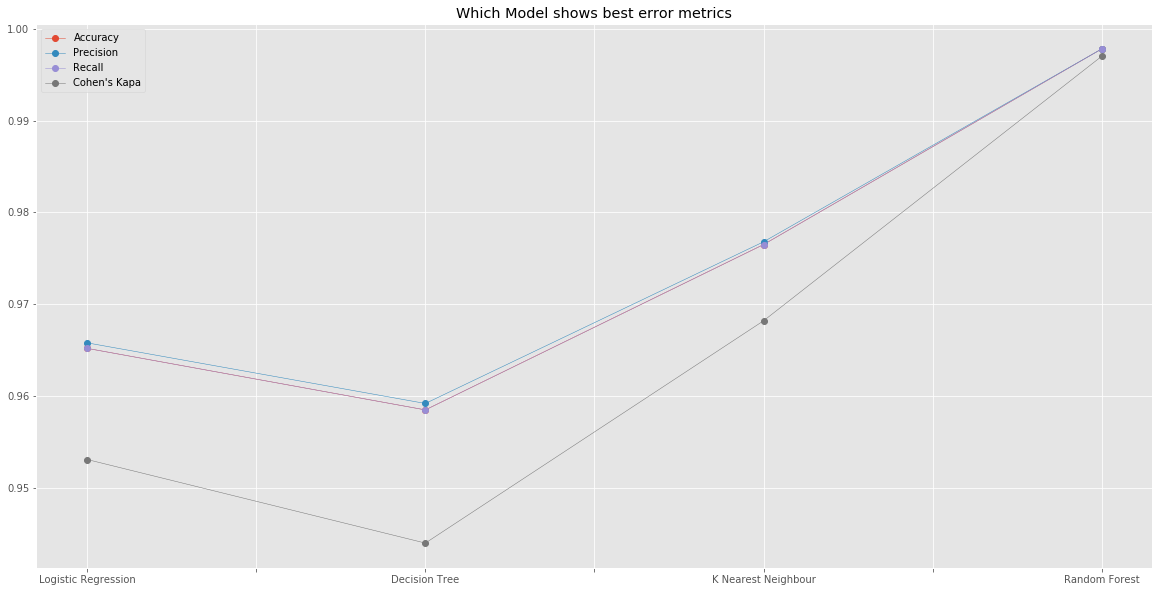

In [131]:
#### ---- VISUALISE ERROR COMPARISON TABLE ---- ####

error_df_flat.plot(marker="o", linewidth=0.5)
error_df.plot(marker="o", linewidth=0.5)
plt.title("Which Model shows best error metrics")